In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import nltk
import re


In [3]:
df= pd.read_csv("Andhadhun.csv")

In [4]:
df.drop('Unnamed: 0',axis=1, inplace= True)

In [5]:
df.head()

,Script of each scene
0,3 EXT.VEGETABLE FIELD.DAY.A half-eaten cabb...
1,He checks his braille watch and rises from the...
2,DAY.Akash playing Fur Elise…as a middle aged l...
3,"'Refreshed old memories….Where are you, Pramod..."
4,Simi: ….and now for the main course.Putting th...


In [6]:
movie = '''Andhadhun'''

In [7]:
#or

Budget= 0
Revenue= 0

In [8]:
#Text Cleaning and Pre Processing

In [9]:
df

,Script of each scene
0,3 EXT.VEGETABLE FIELD.DAY.A half-eaten cabb...
1,He checks his braille watch and rises from the...
2,DAY.Akash playing Fur Elise…as a middle aged l...
3,"'Refreshed old memories….Where are you, Pramod..."
4,Simi: ….and now for the main course.Putting th...
...,...
60,?...(he stares) are you feeling sorry for her?...
61,we hear the sound of the car dicky opening.CUT...
62,.….85 Swami holds his throat and collapses…… ...
63,its almost dead….he tries to limp…and screams ...


In [10]:
# remove special characters, numbers, punctuations
df['Scenes'] = df['Script of each scene'].str.replace("[^a-zA-Z#]", " ")

In [11]:
df.head()

,Script of each scene,Scenes
0,3 EXT.VEGETABLE FIELD.DAY.A half-eaten cabb...,EXT VEGETABLE FIELD DAY A half eaten cabb...
1,He checks his braille watch and rises from the...,He checks his braille watch and rises from the...
2,DAY.Akash playing Fur Elise…as a middle aged l...,DAY Akash playing Fur Elise as a middle aged l...
3,"'Refreshed old memories….Where are you, Pramod...",Refreshed old memories Where are you Pramod...
4,Simi: ….and now for the main course.Putting th...,Simi and now for the main course Putting th...


In [12]:
df.head()

,Script of each scene,Scenes
0,3 EXT.VEGETABLE FIELD.DAY.A half-eaten cabb...,EXT VEGETABLE FIELD DAY A half eaten cabb...
1,He checks his braille watch and rises from the...,He checks his braille watch and rises from the...
2,DAY.Akash playing Fur Elise…as a middle aged l...,DAY Akash playing Fur Elise as a middle aged l...
3,"'Refreshed old memories….Where are you, Pramod...",Refreshed old memories Where are you Pramod...
4,Simi: ….and now for the main course.Putting th...,Simi and now for the main course Putting th...


In [13]:
# Plot Word Cloud

In [14]:
# for plotting wordcloud we have to join the words into strings
all_words = ' '.join([text for text in df['Scenes']]).lower()

In [15]:
all_words

'     ext vegetable field day a half eaten cabbage and another and now we see a wild hare feasting on a cabbage patch a scarecrow in the distance stands guard in vain we are in a vegetable patch in a field  besides a desolate road  leading to a distant highway and now we see a pair of feet cautiously moving forward thru the field it s an angry farmer with a rifle   the hare s ears perk up as the farmer quietly advances thru the bushes and shrubs the hare darts across the field  tensing up and now we see the hare in close up it s got nasty scars where the eyes should be  we now realize the hare is blind the farmer cocks his gun and aims at the hare the blind hare senses danger  it dashes blindly in the opposite direction  hitting the scarecrow pole full force the scarecrow shakes a bit and stops the hare recovers  frozen for a second the farmer advances stealthily the farmer steps on a dry bisleri bottle in the field the sound alerts the hare it hops on the road  stands at a milestone  

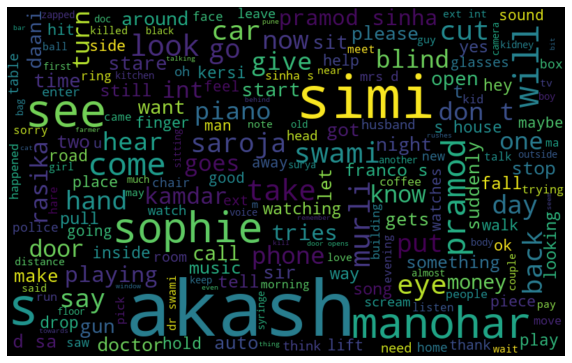

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
import collections
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

filtered_words = [word for word in all_words.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

word_count = {}

for letter, count in counted_words.most_common(40):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: akash, count: 497
Word: simi, count: 273
Word: s, count: 272
Word: manohar, count: 141
Word: see, count: 133
Word: sophie, count: 131
Word: pramod, count: 107
Word: will, count: 89
Word: t, count: 80
Word: swami, count: 73
Word: murli, count: 60
Word: looks, count: 57
Word: car, count: 55
Word: day, count: 51
Word: eyes, count: 50
Word: go, count: 49
Word: cut, count: 48
Word: int, count: 48
Word: saroja, count: 48
Word: back, count: 45
Word: now, count: 44
Word: blind, count: 43
Word: piano, count: 43
Word: one, count: 43
Word: door, count: 43
Word: house, count: 43
Word: come, count: 42
Word: comes, count: 39
Word: don, count: 39
Word: phone, count: 36
Word: sinha, count: 35
Word: ext, count: 34
Word: rasika, count: 34
Word: around, count: 33
Word: franco, count: 33
Word: says, count: 33
Word: takes, count: 32
Word: night, count: 32
Word: know, count: 31
Word: goes, count: 31


In [18]:
words= all_words.split(" ")

In [19]:
wc= list(word_count.keys())
wc

['akash',
 'simi',
 's',
 'manohar',
 'see',
 'sophie',
 'pramod',
 'will',
 't',
 'swami',
 'murli',
 'looks',
 'car',
 'day',
 'eyes',
 'go',
 'cut',
 'int',
 'saroja',
 'back',
 'now',
 'blind',
 'piano',
 'one',
 'door',
 'house',
 'come',
 'comes',
 'don',
 'phone',
 'sinha',
 'ext',
 'rasika',
 'around',
 'franco',
 'says',
 'takes',
 'night',
 'know',
 'goes']

In [20]:
w= wc.copy()

In [21]:
for i in w:
    if len(i)==1:
        wc.remove(i)

In [22]:
wc

['akash',
 'simi',
 'manohar',
 'see',
 'sophie',
 'pramod',
 'will',
 'swami',
 'murli',
 'looks',
 'car',
 'day',
 'eyes',
 'go',
 'cut',
 'int',
 'saroja',
 'back',
 'now',
 'blind',
 'piano',
 'one',
 'door',
 'house',
 'come',
 'comes',
 'don',
 'phone',
 'sinha',
 'ext',
 'rasika',
 'around',
 'franco',
 'says',
 'takes',
 'night',
 'know',
 'goes']

In [23]:
wc1 = list(enumerate(wc, start=0))
wc1

[(0, 'akash'),
 (1, 'simi'),
 (2, 'manohar'),
 (3, 'see'),
 (4, 'sophie'),
 (5, 'pramod'),
 (6, 'will'),
 (7, 'swami'),
 (8, 'murli'),
 (9, 'looks'),
 (10, 'car'),
 (11, 'day'),
 (12, 'eyes'),
 (13, 'go'),
 (14, 'cut'),
 (15, 'int'),
 (16, 'saroja'),
 (17, 'back'),
 (18, 'now'),
 (19, 'blind'),
 (20, 'piano'),
 (21, 'one'),
 (22, 'door'),
 (23, 'house'),
 (24, 'come'),
 (25, 'comes'),
 (26, 'don'),
 (27, 'phone'),
 (28, 'sinha'),
 (29, 'ext'),
 (30, 'rasika'),
 (31, 'around'),
 (32, 'franco'),
 (33, 'says'),
 (34, 'takes'),
 (35, 'night'),
 (36, 'know'),
 (37, 'goes')]

In [24]:
char1= word_count[wc[0]]
char2= word_count[wc[1]]
char3= word_count[wc[2]]

char1, char2, char3

(497, 273, 141)

In [25]:
#pip install pyplutchik

In [26]:
from LeXmo import LeXmo

emo= LeXmo.LeXmo(all_words)
emo

from pyplutchik import plutchik

del emo['text']
del emo['negative']
del emo['positive']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
#VADER Analysis

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [28]:
df["Vader Scores"]= df["Scenes"].apply(lambda review:sid.polarity_scores(review))

In [29]:
df["Vader Compound Score"]= df["Vader Scores"].apply(lambda d:d['compound'])

In [30]:
#pip install textblob

In [31]:
#Text Blob
scene=list(df["Scenes"])

from textblob import TextBlob

senti=[]
for i in range(0,len(scene)):
    my_valence=TextBlob(scene[i])
    senti.append(my_valence.sentiment[0])

In [32]:
df["Textblob Score"]= senti

In [33]:
df["Scene Number"]= df.index

In [34]:
#pip install LeXmo

In [35]:
#Emolex Sentiment

df["Plutchik"]= df["Scenes"].apply(lambda scene:LeXmo.LeXmo(scene))

In [36]:
df

,Script of each scene,Scenes,Vader Scores,Vader Compound Score,Textblob Score,Scene Number,Plutchik
0,3 EXT.VEGETABLE FIELD.DAY.A half-eaten cabb...,EXT VEGETABLE FIELD DAY A half eaten cabb...,"{'neg': 0.108, 'neu': 0.845, 'pos': 0.047, 'co...",-0.9694,-0.111190,0,{'text': ' EXT VEGETABLE FIELD DAY A half ...
1,He checks his braille watch and rises from the...,He checks his braille watch and rises from the...,"{'neg': 0.058, 'neu': 0.848, 'pos': 0.094, 'co...",0.9060,0.039468,1,{'text': 'He checks his braille watch and rise...
2,DAY.Akash playing Fur Elise…as a middle aged l...,DAY Akash playing Fur Elise as a middle aged l...,"{'neg': 0.055, 'neu': 0.798, 'pos': 0.147, 'co...",0.9883,0.138952,2,{'text': 'DAY Akash playing Fur Elise as a mid...
3,"'Refreshed old memories….Where are you, Pramod...",Refreshed old memories Where are you Pramod...,"{'neg': 0.018, 'neu': 0.836, 'pos': 0.147, 'co...",0.9907,0.223696,3,{'text': ' Refreshed old memories Where are y...
4,Simi: ….and now for the main course.Putting th...,Simi and now for the main course Putting th...,"{'neg': 0.085, 'neu': 0.767, 'pos': 0.148, 'co...",0.9774,0.031481,4,{'text': 'Simi and now for the main course ...
...,...,...,...,...,...,...,...
60,?...(he stares) are you feeling sorry for her?...,he stares are you feeling sorry for her ...,"{'neg': 0.109, 'neu': 0.796, 'pos': 0.095, 'co...",-0.8068,-0.029729,60,{'text': ' he stares are you feeling sorr...
61,we hear the sound of the car dicky opening.CUT...,we hear the sound of the car dicky opening CUT...,"{'neg': 0.032, 'neu': 0.816, 'pos': 0.152, 'co...",0.9903,0.044024,61,{'text': 'we hear the sound of the car dicky o...
62,.….85 Swami holds his throat and collapses…… ...,Swami holds his throat and collapses ...,"{'neg': 0.108, 'neu': 0.821, 'pos': 0.07, 'com...",-0.8645,-0.072208,62,{'text': ' Swami holds his throat and col...
63,its almost dead….he tries to limp…and screams ...,its almost dead he tries to limp and screams ...,"{'neg': 0.14, 'neu': 0.778, 'pos': 0.082, 'com...",-0.9793,-0.111325,63,{'text': 'its almost dead he tries to limp an...


In [37]:
# cleaning the plutchik column

for i in df.Plutchik:
  del i['text']

In [38]:
emolex=[]

for i in df.Plutchik:
  score= (i['positive'] - i['negative'])
  emolex.append(score)

In [39]:
df["EmoLex Score"]= emolex

In [40]:
anger=[]

for i in df.Plutchik:
  anger.append(i['anger'])

In [41]:
df["Anger"]= anger

In [42]:
Anticipation=[]

for i in df.Plutchik:
  Anticipation.append(i['anticipation'])

In [43]:
df["Anticipation"]= Anticipation

In [46]:
Disgust=[]

for i in df.Plutchik:
  Disgust.append(i['disgust'])

In [47]:
df["Disgust"]= Disgust

In [48]:
Fear=[]

for i in df.Plutchik:
  Fear.append(i['fear'])

In [49]:
df["Fear"]= Fear

In [50]:
Joy=[]

for i in df.Plutchik:
  Joy.append(i['joy'])

In [51]:
df["Joy"]= Joy

In [52]:
Sadness=[]

for i in df.Plutchik:
  Sadness.append(i['sadness'])

In [53]:
df["Sadness"]= Sadness

In [54]:
Surprise=[]

for i in df.Plutchik:
  Surprise.append(i['surprise'])

In [55]:
df["Surprise"]= Surprise

In [56]:
Trust=[]

for i in df.Plutchik:
  Trust.append(i['trust'])

In [57]:
df["Trust"]= Trust

In [58]:
df.head()

,Script of each scene,Scenes,Vader Scores,Vader Compound Score,Textblob Score,Scene Number,Plutchik,EmoLex Score,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,3 EXT.VEGETABLE FIELD.DAY.A half-eaten cabb...,EXT VEGETABLE FIELD DAY A half eaten cabb...,"{'neg': 0.108, 'neu': 0.845, 'pos': 0.047, 'co...",-0.9694,-0.111190,0,"{'anger': 0.015909090909090907, 'anticipation'...",-0.013636,0.015909,0.015909,0.004545,0.029545,0.011364,0.015909,0.015909,0.025000
1,He checks his braille watch and rises from the...,He checks his braille watch and rises from the...,"{'neg': 0.058, 'neu': 0.848, 'pos': 0.094, 'co...",0.9060,0.039468,1,"{'anger': 0.015625, 'anticipation': 0.028125, ...",0.021875,0.015625,0.028125,0.006250,0.034375,0.018750,0.012500,0.018750,0.043750
2,DAY.Akash playing Fur Elise…as a middle aged l...,DAY Akash playing Fur Elise as a middle aged l...,"{'neg': 0.055, 'neu': 0.798, 'pos': 0.147, 'co...",0.9883,0.138952,2,"{'anger': 0.011396011396011397, 'anticipation'...",0.059829,0.011396,0.031339,0.005698,0.008547,0.037037,0.008547,0.034188,0.037037
3,"'Refreshed old memories….Where are you, Pramod...",Refreshed old memories Where are you Pramod...,"{'neg': 0.018, 'neu': 0.836, 'pos': 0.147, 'co...",0.9907,0.223696,3,"{'anger': 0.006535947712418301, 'anticipation'...",0.022876,0.006536,0.035948,0.006536,0.006536,0.029412,0.009804,0.013072,0.009804
4,Simi: ….and now for the main course.Putting th...,Simi and now for the main course Putting th...,"{'neg': 0.085, 'neu': 0.767, 'pos': 0.148, 'co...",0.9774,0.031481,4,"{'anger': 0.026737967914438502, 'anticipation'...",-0.029412,0.026738,0.008021,0.016043,0.026738,0.016043,0.013369,0.024064,0.026738


In [59]:
#Average

df["Average_VET"]= (df["Vader Compound Score"]+ df["Textblob Score"]+ df["EmoLex Score"])/3

In [40]:
#Average VET Scores

count_positive=0
count_neutral=0
count_negative=0

for i in range(0,len(scene)):
    if round(df['Average_VET'][i],1)>0:
        count_positive= count_positive+1
        
    if round(df['Average_VET'][i],1)== 0:
        count_neutral= count_neutral+1
        
    if round(df['Average_VET'][i],1)<0:
        count_negative= count_negative+1
        
  
count_positive,count_neutral,count_negative        
        

(26, 2, 37)

In [41]:
# To remove the negative and positive from the plutchick

for i in range(0,len(scene)):
    del df.Plutchik[i]['negative']
    del df.Plutchik[i]['positive']

In [42]:
sort_Plut=[]
for i in range(0,len(scene)):
    sorted_dict = {}
    sorted_keys = sorted(df.Plutchik[i], key=df.Plutchik[i].get) 
    for w in sorted_keys:
        sorted_dict[w] = df.Plutchik[i][w]

    res= dict(reversed(list(sorted_dict.items())))
    sort_Plut.append(res)

In [43]:
df["Sorted Plutchik"]= sort_Plut

anger=0
anticipation=0
disgust=0
fear=0
joy=0
sadness=0
surprise=0
trust=0

for i in range(0,len(scene)):
    if list(sort_Plut[i])[0]== 'anger'  :
        anger= anger+1
        
    elif list(sort_Plut[i])[0]== 'anticipation'  :
        anticipation= anticipation+1
        
    elif list(sort_Plut[i])[0]== 'disgust'  :
        disgust= disgust+1
        
    elif list(sort_Plut[i])[0]== 'fear'  :
        fear= fear+1
        
    elif list(sort_Plut[i])[0]== 'joy'  :
        joy= joy+1
        
    elif list(sort_Plut[i])[0]== 'sadness'  :
        sadness= sadness+1
        
    elif list(sort_Plut[i])[0]== 'surprise'  :
        surprise= surprise+1
        
    elif list(sort_Plut[i])[0]== 'trust'  :
        trust= trust+1
        
  
anger, anticipation,disgust, fear,sadness, surprise, trust, joy
        

(2, 13, 0, 14, 4, 7, 20, 5)

In [44]:
#Beautiful Soup

In [45]:
#importing required Libraries
import pandas as pd   #to create dataframe
import requests       #to send the request to the URL
from bs4 import BeautifulSoup #to get the content in the form of HTML
import numpy as np  # to count the values (in our case)
from bs4 import BeautifulSoup
import requests

# Function to get Movie Details


def getMovieDetails(movieName):
    url = 'https://www.imdb.com'

    # Query to find movie title
    query = '/search/title?title='

    # Query formed
    movienamequery = query+'+'.join(movieName.strip().split(' '))
    #print("movie query name is =====",movienamequery)

    # WebPage is obtained and parsed
    url1 = url+movienamequery+'&title_type=feature'
    

    #url = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'
    #request allow you to send HTTP request
    response = requests.get(url1)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    
    #creating an empty list, so that we can append the values
    movie_name = []
    year = []
    time = []
    rating = []
    metascore = []
    votes = []
    gross = []
    description = []
    Director = []
    Stars = []
    Genre = []

    #storing the meaningfull required data in the variable
    movie_data = soup.findAll('div', attrs= {'class': 'lister-item mode-advanced'})

#calling one by one using for loop
    for store in movie_data:
        name = store.h3.a.text
        movie_name.append(name)

        year_of_release = store.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(', '').replace(')', '')
        year.append(year_of_release)

        runtime = store.p.find('span', class_ = 'runtime').text.replace(' min', '')
        time.append(runtime)
        
        genre = store.p.find('span', class_ = 'genre').text.replace('\n', '').rstrip().split(',')
        Genre.append(genre)

        rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
        rating.append(rate)

        meta  = store.find('span', class_ = 'metascore').text.replace(' ', '') if store.find('span', class_ = 'metascore') else '^^^^^^'
        metascore.append(meta)
        #since, gross and votes have same attributes, that's why we had created a common variable and then used indexing
        value = store.find_all('span', attrs = {'name': 'nv'})

        vote = value[0].text
        votes.append(vote)

        grosses = value[1].text if len(value) >1 else '*****'
        gross.append(grosses)

        # Description of the Movies
        describe = store.find_all('p', class_ = 'text-muted')
        description_ = describe[1].text.replace('\n', '') if len(describe) >1 else '*****'
        description.append(description_)

        #Cast Details -- Scraping Director name and Stars
        cast = store.find("p", class_ = '')
        cast = cast.text.replace('\n', '').split('|')
        cast = [x.strip() for x in cast]
        cast = [cast[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
        Director.append(cast[0])
        Stars.append([x.strip() for x in cast[1].split(",")])
        
        #creating a dataframe using pandas library
        movie_DF = pd.DataFrame({'Name of movie': movie_name, 'Movie Rating': rating, 'Metascore': metascore, 'Year of Release': year, 'Watchtime': time, 'Votes': votes, 'Gross collection': gross, 'Description': description, "Director": Director, 'Star': Stars , 'Genre': Genre})

        #print(movie_data)
        print(url1)
        return(movie_DF)
        



In [46]:
movieName = movie

In [47]:
candy = getMovieDetails(movieName)

https://www.imdb.com/search/title?title=Andhadhun&title_type=feature


In [48]:
if len(candy.Genre[0]) == 1:
    candy.Genre[0].append(None)
    candy.Genre[0].append(None)
elif len(candy.Genre[0]) == 2:
    candy.Genre[0].append(None)

In [49]:
candy

,Name of movie,Movie Rating,Metascore,Year of Release,Watchtime,Votes,Gross collection,Description,Director,Star,Genre
0,Andhadhun,8.2,^^^^^^,2018,139,"92,198",$1.37M,A series of mysterious events change the life ...,Sriram Raghavan,"[Ayushmann Khurrana, Tabu, Radhika Apte, Anil ...","[Comedy, Crime, Music]"


In [50]:
# making the dataframe with all the generated values

data_nttd = pd.DataFrame({'Movie':[candy["Name of movie"][0]],
                     'Average Positive Sentiment':[count_positive],
                     'Average Negative Sentiment':[count_negative],
                     'Average Neutral Sentiment':[count_neutral],
                          'Anger_Score': round(emo['anger'],4),
                          'Anticipation_Score': round(emo['anticipation'],4),
                          'Disgust_Score': round(emo['disgust'],4),
                          'Fear_Score': round(emo['fear'],4),
                          'Joy_Score': round(emo['joy'],4),
                          'Sadness_Score': round(emo['sadness'],4),
                          'Surprise_Score': round(emo['surprise'],4),
                          'Trust_Score': round(emo['trust'],4),
                    'Anger':[anger],
                    'Anticipation':[anticipation],
                    'Disgust':[disgust],
                    'Fear':[fear],
                          'Joy': joy,
                    'Sadness':[sadness],
                    'Surprise':[surprise],
                    'Trust':[trust],
                          'Director':[candy.Director[0]],
                         'Star1':candy.Star[0][0],
                         'Star2':candy.Star[0][1],
                         'Star3':candy.Star[0][2],
                         'Genre1':candy.Genre[0][0],
                          'Genre2':candy.Genre[0][1],
                          'Genre3':candy.Genre[0][2],
                         'Budget': [Budget],
                         'Revenue':[Revenue]})

data_nttd

,Movie,Average Positive Sentiment,Average Negative Sentiment,Average Neutral Sentiment,Anger_Score,Anticipation_Score,Disgust_Score,Fear_Score,Joy_Score,Sadness_Score,...,Trust,Director,Star1,Star2,Star3,Genre1,Genre2,Genre3,Budget,Revenue
0,Andhadhun,26,37,2,0.0154,0.0207,0.0092,0.0188,0.015,0.0137,...,20,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte,Comedy,Crime,Music,0,0


In [51]:
candy= candy.drop(['Name of movie', 'Gross collection', 'Description','Star', 'Genre','Director'], axis=1)

In [52]:
dat= pd.concat([data_nttd,candy], axis=1)

In [53]:
dat

,Movie,Average Positive Sentiment,Average Negative Sentiment,Average Neutral Sentiment,Anger_Score,Anticipation_Score,Disgust_Score,Fear_Score,Joy_Score,Sadness_Score,...,Genre1,Genre2,Genre3,Budget,Revenue,Movie Rating,Metascore,Year of Release,Watchtime,Votes
0,Andhadhun,26,37,2,0.0154,0.0207,0.0092,0.0188,0.015,0.0137,...,Comedy,Crime,Music,0,0,8.2,^^^^^^,2018,139,"92,198"


In [54]:
list1= list(dat.iloc[0,:])

In [55]:
#1st movie

In [56]:
#film_csv_data = dat.to_csv('films_rollnumber.csv', index = True)  #run this in the first movie

In [57]:
#subsequent movies

In [58]:
#appending as rows

from csv import writer
  
# List 
list1= list(dat.iloc[0,:])
  
# Open our existing CSV file in append mode
# Create a file object for this file
with open('films_rollnumber.csv', 'a') as f_object:
  
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
  
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(list1)
  
    #Close the file object
    f_object.close()

In [59]:
#Exports

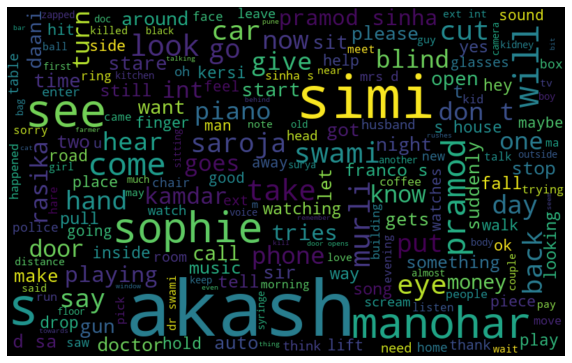

In [60]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<AxesSubplot:title={'center':'Vader Sentiment Score arc'}, xlabel='Scene Number'>

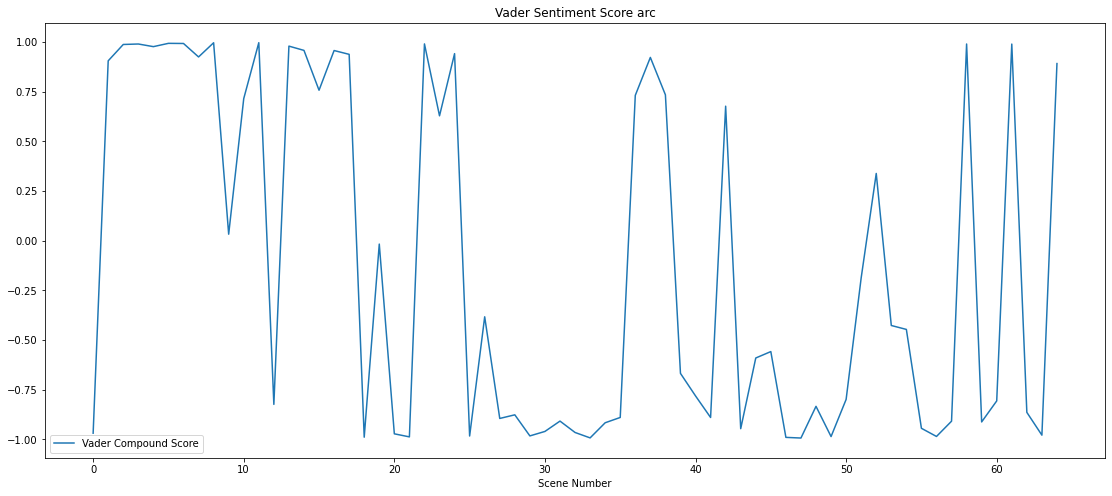

In [62]:
df.plot(x= "Scene Number", y=["Vader Compound Score"], title= "Vader Sentiment Score arc", 
figsize=(19, 8))



<AxesSubplot:title={'center':'Textblob Sentiment Score arc'}, xlabel='Scene Number'>

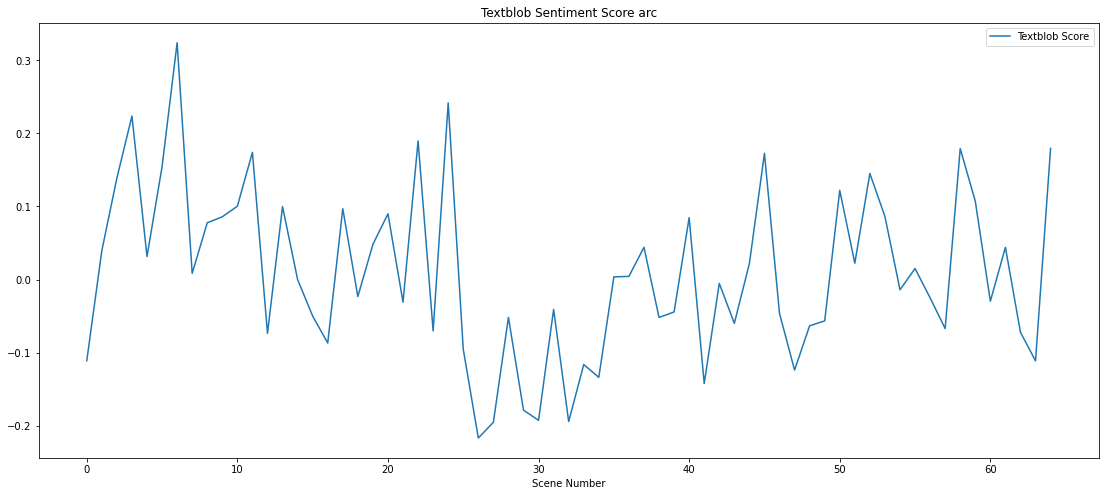

In [63]:


df.plot(x= "Scene Number", y=["Textblob Score"], title= "Textblob Sentiment Score arc", 
figsize=(19, 8))

<AxesSubplot:title={'center':'Emolex Sentiment Score arc'}, xlabel='Scene Number'>

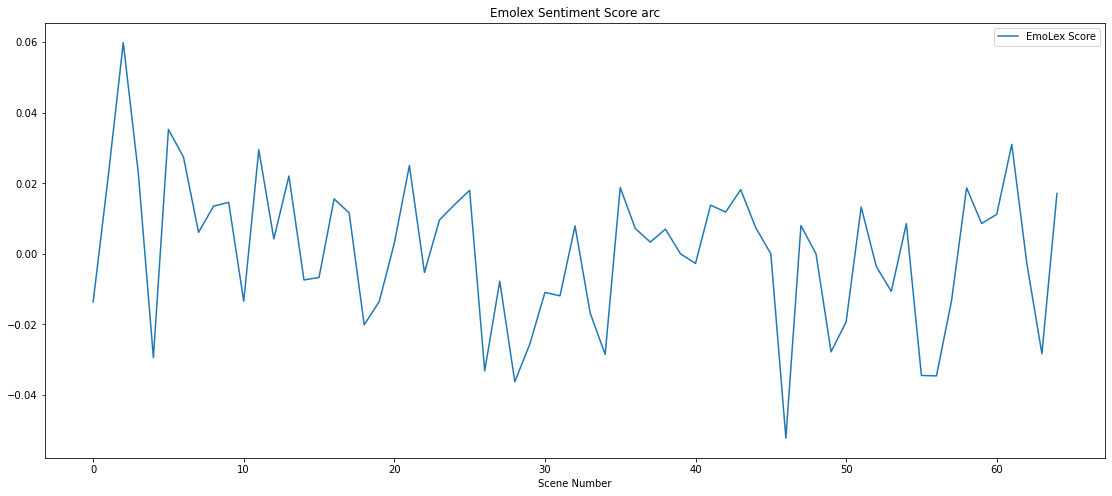

In [66]:

df.plot(x= "Scene Number", y=["EmoLex Score"], title= "Emolex Sentiment Score arc", 
figsize=(19, 8))

In [68]:
df.head()

,Script of each scene,Scenes,Vader Scores,Vader Compound Score,Textblob Score,Scene Number,Plutchik,EmoLex Score,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,Average_VET
0,3 EXT.VEGETABLE FIELD.DAY.A half-eaten cabb...,EXT VEGETABLE FIELD DAY A half eaten cabb...,"{'neg': 0.108, 'neu': 0.845, 'pos': 0.047, 'co...",-0.9694,-0.111190,0,"{'anger': 0.015909090909090907, 'anticipation'...",-0.013636,0.015909,0.015909,0.004545,0.029545,0.011364,0.015909,0.015909,0.025000,-0.364742
1,He checks his braille watch and rises from the...,He checks his braille watch and rises from the...,"{'neg': 0.058, 'neu': 0.848, 'pos': 0.094, 'co...",0.9060,0.039468,1,"{'anger': 0.015625, 'anticipation': 0.028125, ...",0.021875,0.015625,0.028125,0.006250,0.034375,0.018750,0.012500,0.018750,0.043750,0.322448
2,DAY.Akash playing Fur Elise…as a middle aged l...,DAY Akash playing Fur Elise as a middle aged l...,"{'neg': 0.055, 'neu': 0.798, 'pos': 0.147, 'co...",0.9883,0.138952,2,"{'anger': 0.011396011396011397, 'anticipation'...",0.059829,0.011396,0.031339,0.005698,0.008547,0.037037,0.008547,0.034188,0.037037,0.395694
3,"'Refreshed old memories….Where are you, Pramod...",Refreshed old memories Where are you Pramod...,"{'neg': 0.018, 'neu': 0.836, 'pos': 0.147, 'co...",0.9907,0.223696,3,"{'anger': 0.006535947712418301, 'anticipation'...",0.022876,0.006536,0.035948,0.006536,0.006536,0.029412,0.009804,0.013072,0.009804,0.412424
4,Simi: ….and now for the main course.Putting th...,Simi and now for the main course Putting th...,"{'neg': 0.085, 'neu': 0.767, 'pos': 0.148, 'co...",0.9774,0.031481,4,"{'anger': 0.026737967914438502, 'anticipation'...",-0.029412,0.026738,0.008021,0.016043,0.026738,0.016043,0.013369,0.024064,0.026738,0.326490


<AxesSubplot:title={'center':'Average Sentiment Score arc'}, xlabel='Scene Number'>

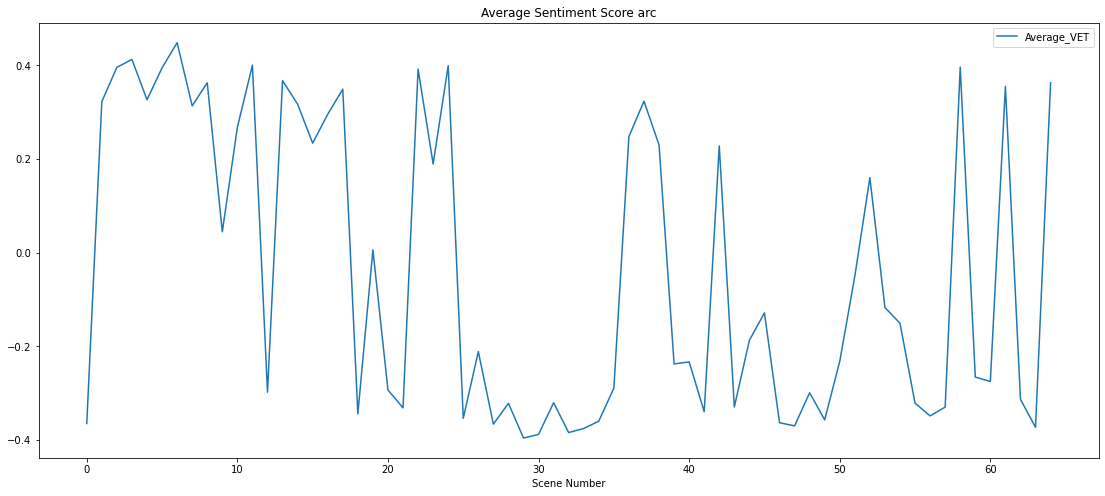

In [69]:
df.plot(x= "Scene Number", y=["Average_VET"], title= "Average Sentiment Score arc", 
figsize=(19, 8))

<AxesSubplot:title={'center':'Anger Score arc'}, xlabel='Scene Number'>

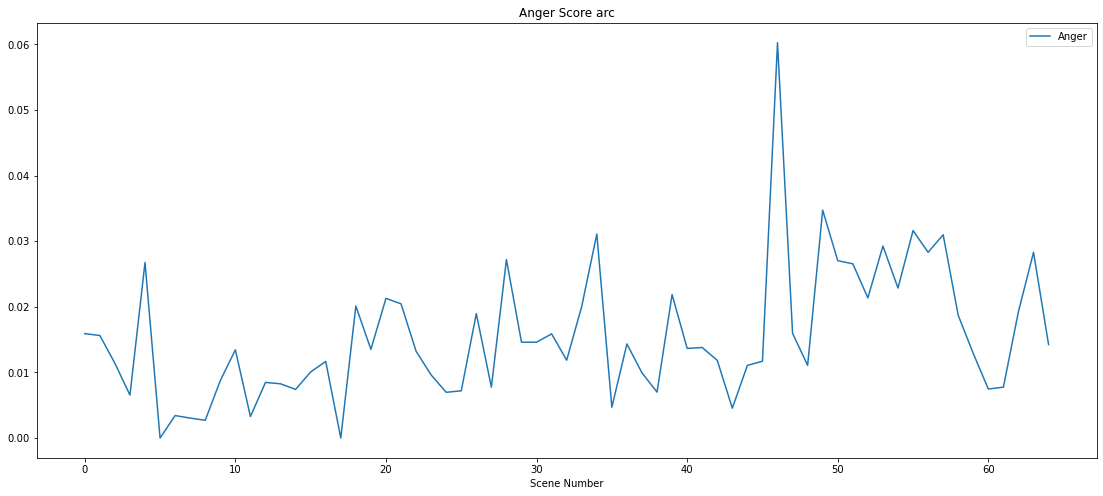

In [70]:
df.plot(x= "Scene Number", y=["Anger"], title= "Anger Score arc", 
figsize=(19, 8))

<AxesSubplot:title={'center':'Anticipation Score arc'}, xlabel='Scene Number'>

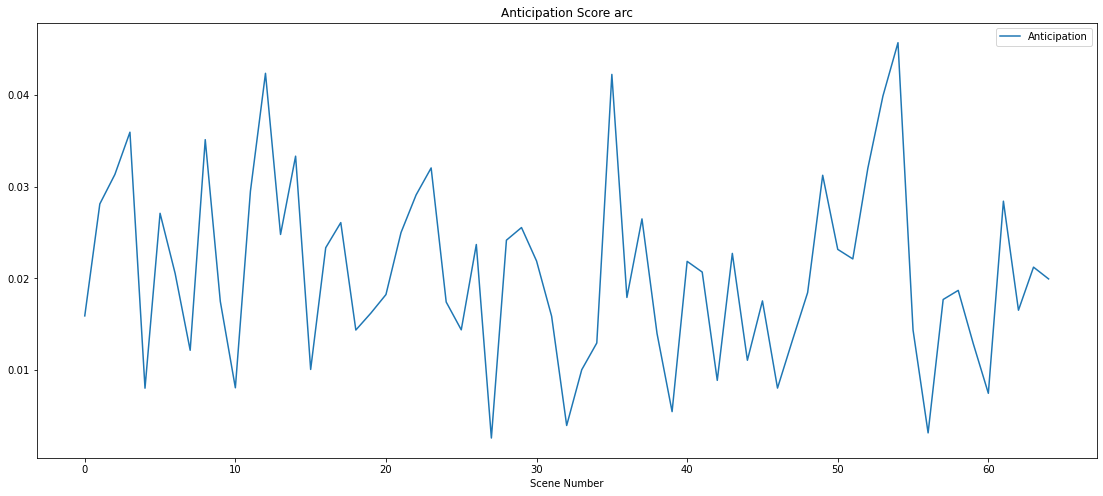

In [71]:
df.plot(x= "Scene Number", y=["Anticipation"], title= "Anticipation Score arc", 
figsize=(19, 8))

<AxesSubplot:title={'center':'Disgust Score arc'}, xlabel='Scene Number'>

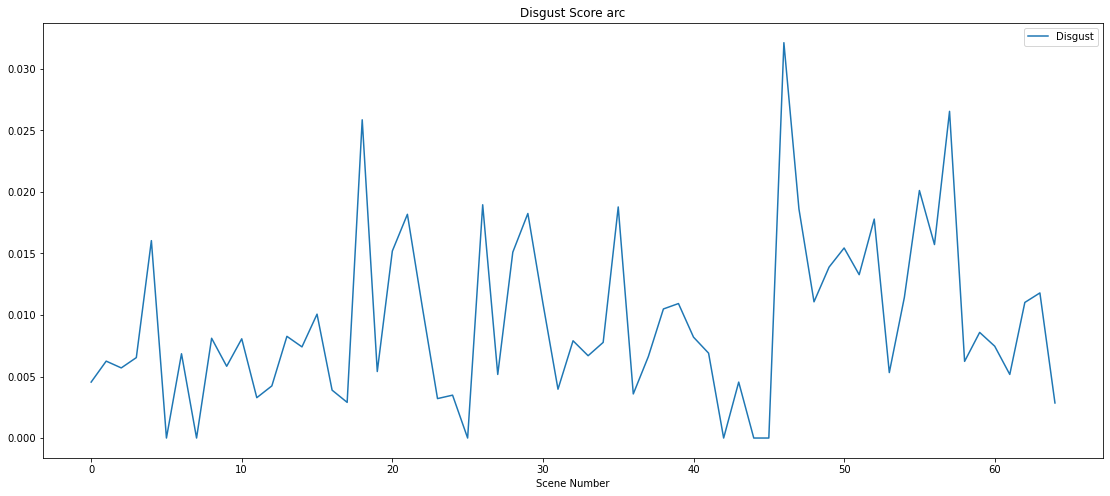

In [72]:
df.plot(x= "Scene Number", y=["Disgust"], title= "Disgust Score arc", 
figsize=(19, 8))

<AxesSubplot:title={'center':'Fear Score arc'}, xlabel='Scene Number'>

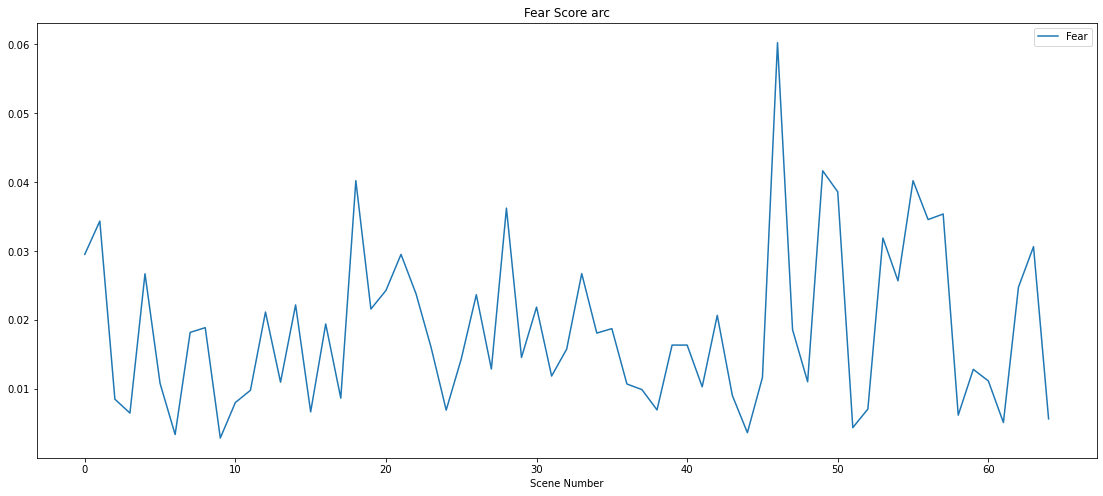

In [73]:
df.plot(x= "Scene Number", y=["Fear"], title= "Fear Score arc", 
figsize=(19, 8))

<AxesSubplot:title={'center':'Joy Score arc'}, xlabel='Scene Number'>

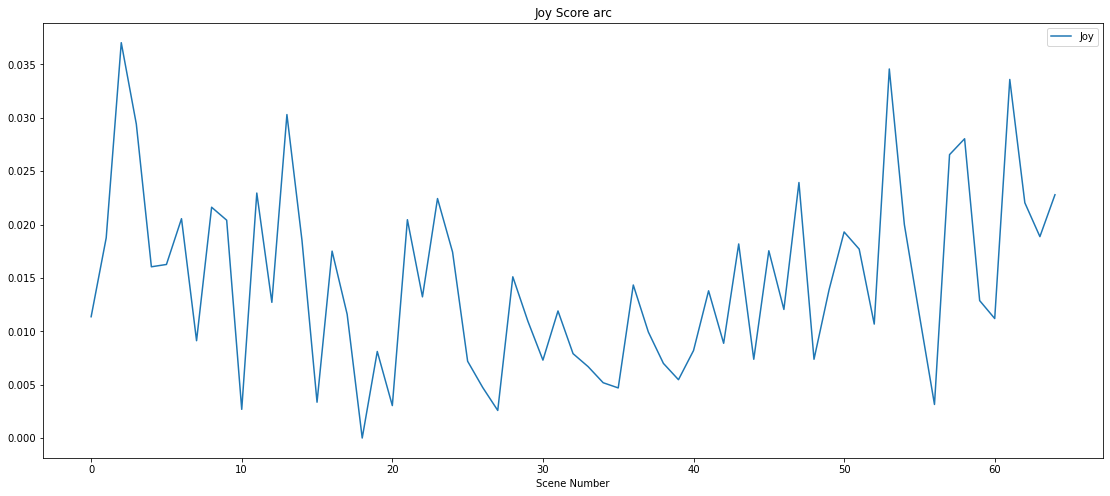

In [74]:
df.plot(x= "Scene Number", y=["Joy"], title= "Joy Score arc", 
figsize=(19, 8))

<AxesSubplot:title={'center':'Sadness Score arc'}, xlabel='Scene Number'>

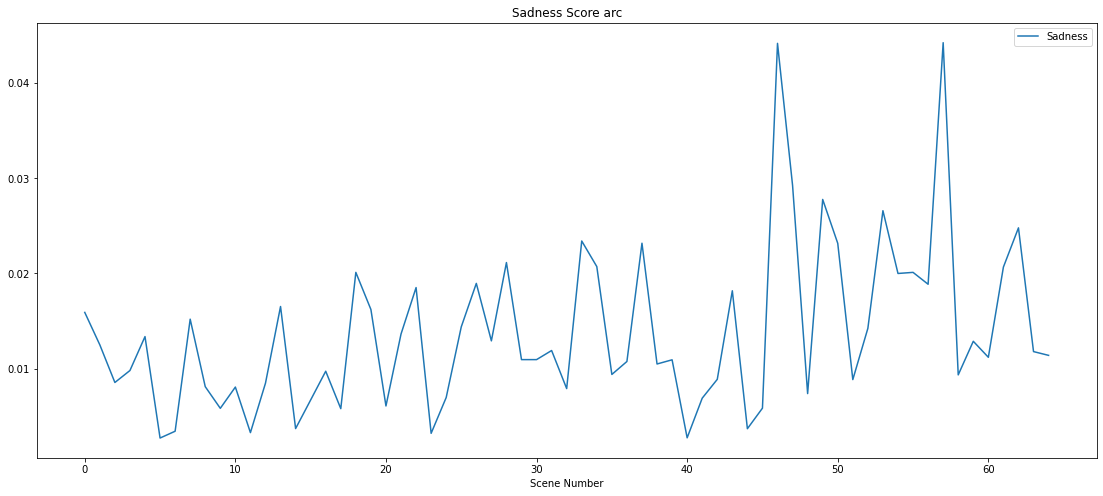

In [75]:
df.plot(x= "Scene Number", y=["Sadness"], title= "Sadness Score arc", 
figsize=(19, 8))

<AxesSubplot:title={'center':'Surprise Score arc'}, xlabel='Scene Number'>

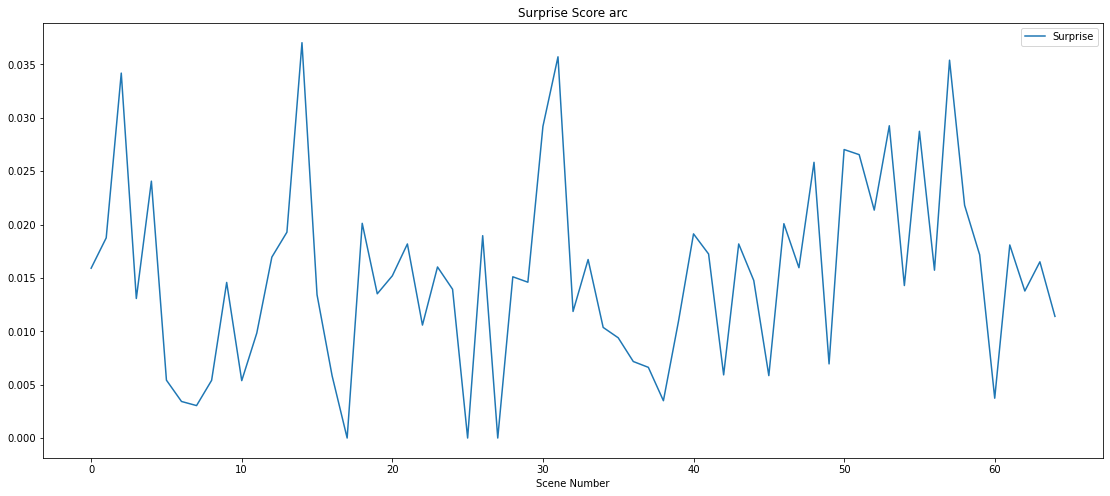

In [76]:
df.plot(x= "Scene Number", y=["Surprise"], title= "Surprise Score arc", 
figsize=(19, 8))

<AxesSubplot:title={'center':'Trust Score arc'}, xlabel='Scene Number'>

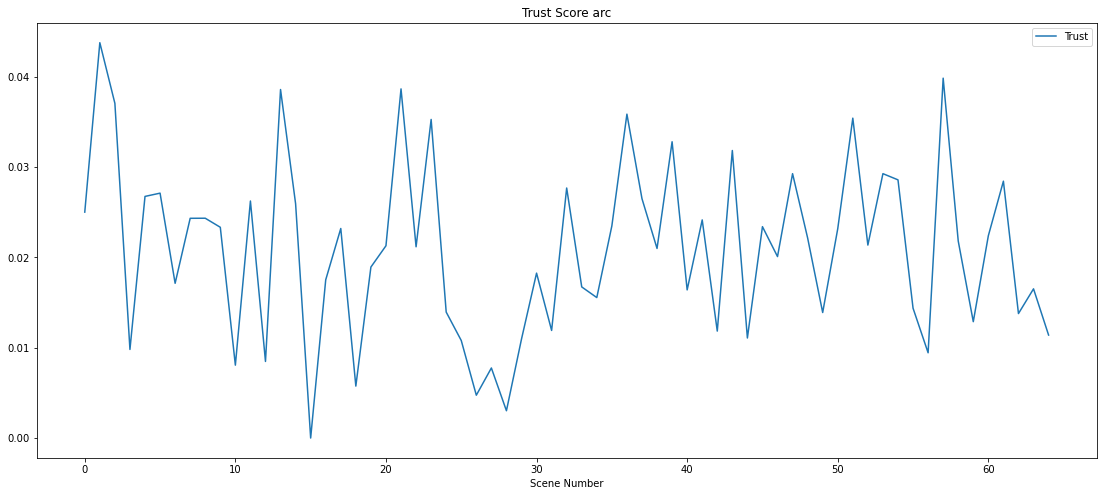

In [77]:
df.plot(x= "Scene Number", y=["Trust"], title= "Trust Score arc", 
figsize=(19, 8))

In [65]:
df.head()

,Script of each scene,Scenes,Vader Scores,Vader Compound Score,Textblob Score,Scene Number,Plutchik,EmoLex Score,Average_VET,Sorted Plutchik
0,3 EXT.VEGETABLE FIELD.DAY.A half-eaten cabb...,EXT VEGETABLE FIELD DAY A half eaten cabb...,"{'neg': 0.108, 'neu': 0.845, 'pos': 0.047, 'co...",-0.9694,-0.111190,0,"{'anger': 0.015909090909090907, 'anticipation'...",-0.013636,-0.364742,"{'fear': 0.029545454545454545, 'trust': 0.025,..."
1,He checks his braille watch and rises from the...,He checks his braille watch and rises from the...,"{'neg': 0.058, 'neu': 0.848, 'pos': 0.094, 'co...",0.9060,0.039468,1,"{'anger': 0.015625, 'anticipation': 0.028125, ...",0.021875,0.322448,"{'trust': 0.04375, 'fear': 0.034375, 'anticipa..."
2,DAY.Akash playing Fur Elise…as a middle aged l...,DAY Akash playing Fur Elise as a middle aged l...,"{'neg': 0.055, 'neu': 0.798, 'pos': 0.147, 'co...",0.9883,0.138952,2,"{'anger': 0.011396011396011397, 'anticipation'...",0.059829,0.395694,"{'trust': 0.037037037037037035, 'joy': 0.03703..."
3,"'Refreshed old memories….Where are you, Pramod...",Refreshed old memories Where are you Pramod...,"{'neg': 0.018, 'neu': 0.836, 'pos': 0.147, 'co...",0.9907,0.223696,3,"{'anger': 0.006535947712418301, 'anticipation'...",0.022876,0.412424,"{'anticipation': 0.03594771241830065, 'joy': 0..."
4,Simi: ….and now for the main course.Putting th...,Simi and now for the main course Putting th...,"{'neg': 0.085, 'neu': 0.767, 'pos': 0.148, 'co...",0.9774,0.031481,4,"{'anger': 0.026737967914438502, 'anticipation'...",-0.029412,0.326490,"{'trust': 0.026737967914438502, 'fear': 0.0267..."


<AxesSubplot:>

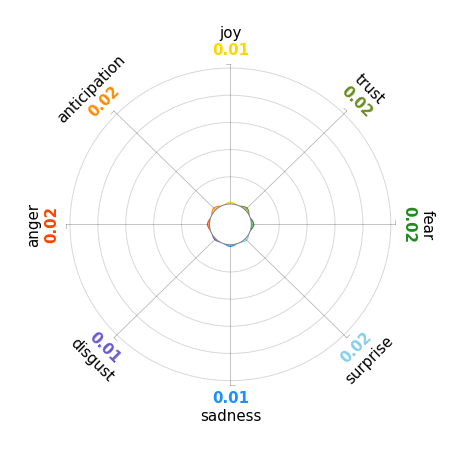

In [66]:
plutchik(emo)

In [67]:
emo

{'anger': 0.015410958904109588,
 'anticipation': 0.02069471624266145,
 'disgust': 0.009197651663405087,
 'fear': 0.018835616438356163,
 'joy': 0.014970645792563601,
 'sadness': 0.013747553816046967,
 'surprise': 0.015019569471624266,
 'trust': 0.020939334637964775}

In [68]:
for i in emo:
    res[i] = 40*emo[i]

<AxesSubplot:>

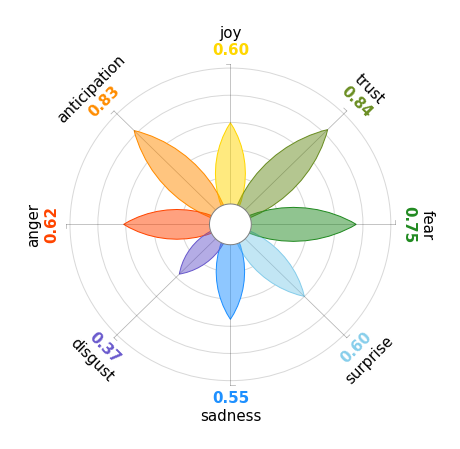

In [69]:
plutchik(res)